In [18]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
train_data = 'data/train'
test_data = 'data/test'

In [20]:
def one_hot_label(label):
    if label=='1':
        ohl = np.array([1,0])
    elif label == '0':
        ohl = np.array([0,1])
    return ohl 

In [21]:
def train_data_with_labels():
    train_images = []
    for dir in os.listdir('data/train'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/train',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            train_images.append([np.array(img), one_hot_label(label)])
    shuffle(train_images)
    return train_images        

In [22]:
def test_data_with_labels():
    test_images = []
    for dir in os.listdir('data/test'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/test',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            test_images.append([np.array(img), one_hot_label(label)])
    shuffle(test_images)
    return test_images        

In [23]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [24]:
training_images = train_data_with_labels()
testing_images = test_data_with_labels()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,28,28,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,28,28,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

0
1
0
1


In [25]:
model = Sequential()

# model.add(InputLayer(input_shape=[28,28,1]))
model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=80, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=100, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=100, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Dropout(0.5))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data, y= tr_lbl_data, epochs=70, batch_size=100)

/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  """
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  
/home/vi

Epoch 1/70
478/478 [==============================] - 1s 2ms/step - loss: 2.5525 - acc: 0.5272
Epoch 2/70
478/478 [==============================] - 0s 708us/step - loss: 0.7404 - acc: 0.5293
Epoch 3/70
478/478 [==============================] - 0s 747us/step - loss: 0.5194 - acc: 0.7678
Epoch 4/70
478/478 [==============================] - 0s 719us/step - loss: 0.2687 - acc: 0.8975
Epoch 5/70
478/478 [==============================] - 0s 725us/step - loss: 0.1399 - acc: 0.9435
Epoch 6/70
478/478 [==============================] - 0s 734us/step - loss: 0.1260 - acc: 0.9561
Epoch 7/70
478/478 [==============================] - 0s 912us/step - loss: 0.0947 - acc: 0.9623
Epoch 8/70
478/478 [==============================] - 0s 760us/step - loss: 0.0764 - acc: 0.9623
Epoch 9/70
478/478 [==============================] - 0s 791us/step - loss: 0.0578 - acc: 0.9833
Epoch 10/70
478/478 [==============================] - 0s 773us/step - loss: 0.0228 - acc: 0.9937
Epoch 11/70
478/478 [==========

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 6, 7)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 6, 50)         8800      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 2, 10)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 2, 80)         12880     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 1, 16)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 1, 100)        25700     
__________

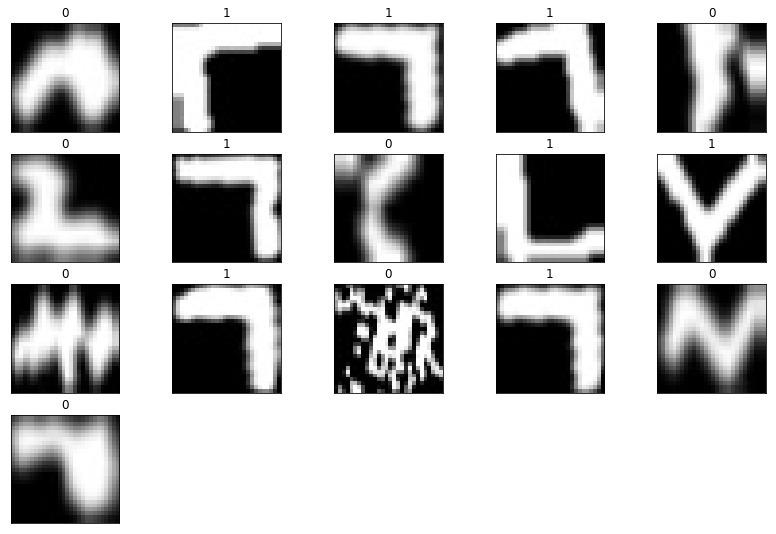

In [29]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[0:]):
    y = fig.add_subplot(6,5, cnt+1)
    img = data[0]
    data = img.reshape(1,28,28,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label = '0'
    else:
        str_label = '1'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [27]:
model.save('model.hdf5')

## Plotting bounding box of detected images in 'plot' directory

#### For testing purposes only

In [28]:
from image_process import (
    threshold,
    morphology,
    find_contours,
    extra_contour_elimination,
    crop_contour,
    req_contour
)
import csv
import os
import cv2
import numpy as np

In [45]:
dest_dir = 'plot'
def plot(filename,file):
    img = cv2.imread(filename)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    clone = img.copy()
    thresh = threshold(img)
    img, lines = find_contours(thresh)
    final_lines = extra_contour_elimination(lines)
    req = []
    contour = []
    for i,line in enumerate(final_lines):
        _, L = crop_contour(line,thresh)
        img = cv2.resize(L,(28,28))
        data = img.reshape(1,28,28,1)
        model_out = model.predict([data])

        if np.argmax(model_out)==1:
            str_label = '0'
        else:
            str_label = '1'

        if str_label=='1':
            print(file)
            req.append(i)
            contour.append([file,line])
            name = dest_dir+'/'+file
#             print(name)
            

    for index in req:
        rect = cv2.minAreaRect(final_lines[index])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(clone,[box],0,(0,255,0),2)
        cv2.imwrite(name,clone)
    return contour

In [46]:
orig_dir = 'CV-Assignment-Dataset'
for file in os.listdir(orig_dir):
    path = os.path.join(orig_dir,file)
    contour = plot(path,file)

DSC08876.JPG
DJI_0422.JPG
DJI_0422.JPG
DJI_0083.JPG
DJI_0083.JPG
DSC01453.JPG
M1_F1.3_0405.JPG
M1_F1.3_0405.JPG
DJI_0617.JPG
DJI_0036.JPG
DJI_0616.JPG
DJI_0086.JPG
DJI_0086.JPG
DJI_0086.JPG
DJI_0086.JPG
